# Setup

In [1]:
warning off; 
project('seqNMF')
warning on

Entering /home/ryoung/Projects/regionalspec
Entering /home/ryoung/Projects


Let's get some helper functions

In [2]:
%%file ~/Projects/deltacoherence/+utils/restoreVariables.m
function restoreVariables(S, where)
if nargin == 1
where = 'base';
end
disp('restoring variables')
for field = fieldnames(S)'
if ~isa(S.(field{1}),'matlab.ui.figure')
    try
        assignin(where,field{1},S.(field{1}))
    catch MatlabException
        warning('cannot load %s', field{1})
    end
end
end
close all % this is a hack. since I save figures in the matfile, they will appear whenever restoring.
disp('restored.')

Created file '/home/ryoung/Projects/deltacoherence/+utils/restoreVariables.m'.


Parametric flags

In [4]:
% Flags
skipMaster = true;
storeDatBeforeSubsamp = true;
subsample = 0.085; % fraction of data to sample
resultsFolder = project('seqNMF');

% -----------------------
% Add animal data to path
% ------------------------
animal_list = {'JS12','JS13','JS14','JS15','JS21','ER1','KL8'};
for animal = animal_list
    animalToPath(animal{1});
end

> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
> In path (line 109)
  In addpath (line 86)
  In project (line 41)
Entering /home/ryoung/Projects
Entering /home/ryoung/Projects


In [5]:
reloadFromMemory = false;
session = 1;

## Load from data 

In [12]:
if reloadFromMemory == false
    InitializeParamsets;
    disp('Available paramsets:')
    paramsetstable = unique(removevars(paramsetstable,'K'))
    % Deal out each of the parameters into unique variables
    disp('Picked set:')
    paramstable = paramsetstable(paramsetstable.timescale == 1 & paramsetstable.type=="speccoh",:),
    params = table2cell(paramstable);
end 
params

Available paramsets:

paramsetstable =

  9x4 table

    epoch_type    timescale        type           seqStyle   
    __________    _________    ____________    ______________

     "run"           0.5       "speccoh"       "Events-based"
     "run"             1       "speccoh"       "Events-based"
     "run"             1       "trajNoWPLI"    "Events-based"
     "run"             4       "speccoh"       "Events-based"
     "run"             4       "traj"          "Events-based"
     "run"             4       "trajNoWPLI"    "Events-based"
     "run"            10       "traj"          ""            
     "run"            10       "traj"          "Events-based"
     "sleep"           3       "speccoh"       "Events-based"

Picked set:

paramstable =

  1x4 table

    epoch_type    timescale      type          seqStyle   
    __________    _________    _________    ______________

      "run"           1        "speccoh"    "Events-based"


params =

  1x4 cell array

    {["run"]} 

Actually load data from animals if we're not reloading from checkpoiint

In [ ]:
if reloadFromMemory  == false
    [epoch_type, timescale, fieldstr, seqStyle] = deal( params{:} );
    seq.initialize('epoch_type', epoch_type,'timescale', timescale, 'fieldstr',...
                    fieldstr, 'orthoName', seqStyle, 'skipList', {'K'}, 'maxiter', 450);
    seqnmf_kws.remove({'K','lambda','lambdaOrthoH','lambdaOrthoW'})
    kws = seq.container2kws(seqnmf_kws);
    folder = seqnmf_folder(fieldstr, kws{:}, 'timescale', timescale, ...
                            'epoch_type', char(epoch_type), 'usedate', false);
    GetData;

    X = data.data;
    trainNEURAL = data.data;
    testNEURAL = data.pre.data(:,~data.subsample_logical);

    mkdir(fullfile(resultsFolder,'findParams'));
    datfolder=fullfile(resultsFolder,'findParams', folder);
    if exist(datfolder,'dir')
        disp('Result exists');
        keyboard;
    end
    mfileLambda = @(resultsFolder, paramFolder) matfile(fullfile(resultsFolder, 'findParams', 'choosek' + string(folder)), 'Writable', true);
    mfile = mfileLambda(resultsFolder, folder)
    mfile.params = paramstable
    mfile.data = data;
end


lambda =

   9.0000e-04

Orthoname = Events-based

ans = 

  Map with properties:

        Count: 1
      KeyType: char
    ValueType: any

    "seqnmf with "    "speccoh"

Using animal info at ~/Data/Raw/SingleDayExpt/JS12_direct/ 
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Using animal info at ~/Data/Raw/SingleDayExpt/JS13_direct/ 
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Using animal info at ~/Data/Raw/SingleDayExpt/JS14_direct/ 
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Using animal info at ~/Data/Raw/SingleDayExpt/JS15_direct/ 
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Using animal info at ~/Data/Raw/SingleDayExpt/JS21_direct/ 
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Using animal info at ~/Data/Raw/SingleDayExpt/ER1_NEW_direct/ 
Processing
P

## Load from checkpoint
This cell would load from checkpoint if not a de novo session.

In [ ]:
if reloadFromMemory == true
    load(sprintf('~/Data/deltacoherence/seqnmf_currentstate_window%d.mat',session))
    disp('done')
    mfile = matfile('~/Data/deltacoherence/findParams/choosekrun.seqnmf_speccoh_1');
end

# Choose $K$: The number of patterns

In [29]:
nSamp = 20;
samprate = data.params.movingwin(2);
sample_length = round((60*5)/samprate);
[nPattern, nTime] = size(X);
disp("Samples = " + nSamp + " with length = " + sample_length +...
     " points for " + (sample_length/60)*data.params.movingwin(2) + " minutes")

Samples = 20 with length = 12000 points for 5 minutes


In [31]:
nFits = 3; %number of fits to compare
kset = 1:12;
ksubset = kset;
Ws = cell(nSamp, nFits, numel(ksubset));
Hs = cell(nSamp, nFits, numel(ksubset));
Diss = zeros(nSamp, nFits, numel(ksubset));


In [ ]:
%% Procedure for choosing K
diary_file = '~/Data/deltacoherence/findParams/lambdadiary-choosekrun.seqnmf_speccoh_1';
if exist(diary_file,'file'); delete(diary_file); end
diary(diary_file)
p = ProgressBar(numel(ksubset) * nSamp * nFits, 'Title', 'Choosing K')
for samp = 1:nSamp
    % Which sample ranges
    samples = randi([1, nTime-sample_length], 1, nSamp)';
    samples = [samples, samples+sample_length];
    for k = ksubset
        display(sprintf('running seqNMF with K = %i',k))
        % Fit seqnmf numfits times
        for ii = 1:nFits
            [Ws{samp,ii,k},Hs{samp,ii,k}] = seqNMF_gpu(X(:, samples(samp,1):samples(samp,2)),'K',k, 'L', L,'lambda', 0,'maxiter',140,'showplot',0); 
            % note that max iter set low (30iter) for speed in demo (not recommended in practice)
        end
        inds = nchoosek(1:nFits,2);
        % Find dissimilarity
        for i = 1:size(inds,1) % consider using parfor for larger numfits
            Diss(samp, i,k) = helper.DISSX(Hs{samp,inds(i,1),k},Ws{samp,inds(i,1),k},...
                Hs{samp, inds(i,2),k},Ws{samp, inds(i,2),k});
        end
        p.step([],[],[]);
    end
    choosek = struct('Diss',Diss, 'nFits', nFits, 'nSamp', nSamp, 'ksubset', ksubset);
    choosek.Ws = Ws;
    choosek.Hs = Hs;
    mfile.choosek = choosek;
end
toc


p = 

  ProgressBar with properties:

     TIMER_TAG_NAME: 'ProgressBar'
            VERSION: '3.1.0'
              Total: 720
              Title: 'Choosing K'
         UpdateRate: 5
               Unit: 'Iterations'
    WorkerDirectory: '/tmp/'
         UseUnicode: true
         IsParallel: false

running seqNMF with K = 1
SeqNMF_gpu:  000%  |                                        | 0/140 [00:00:00<Inf:NaN:NaN, Inf it/s]

Restore variables, if not already in memory. This is mainly if you leave the script and reload from checkpoint.

In [ ]:
choosek = mfile.choosek;
utils.restoreVariables(choosek);
close all

In [94]:
[SAMP, KSAMP, Kset] = ndgrid(1:nSamp, 1:size(Diss,2), 1:numel(ksubset));
Dtable= table(SAMP(:), KSAMP(:), Kset(:), Diss(:), ...
                'VariableNames', {'sample','ksample','k', 'diss'});
Diss = reshape(permute(DissR, [3, 1 2]), numel(kset), []);
[SAMP, Kset] = ndgrid(1:size(DissR,1), 1:size(DissR,2));
sDtable = table(SAMP(:), Kset(:), Diss(:),...
                'VariableNames', {'sample','k', 'diss'});


K =

     8



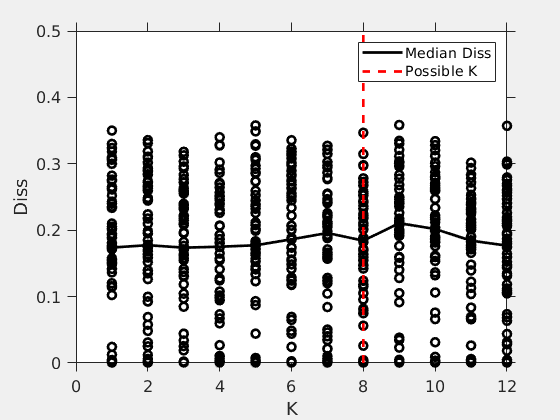

In [134]:
%% Plot Diss and choose K with the minimum average diss.
f=fig("Choose K - " + folder);
plot(kset, Diss,'ko'), hold on
h1 = plot(kset, quantile(Diss,0.5,2),'k-','linewidth',2);
[~,K]  = max(diff(median(Diss,2)))
h2 = plot([K,K],[0,0.5],'r--');
legend([h1 h2], {'Median Diss','Possible K'})
xlabel('K')
ylabel('Diss')

And let's look at how that appears when we now plot each invididual sample

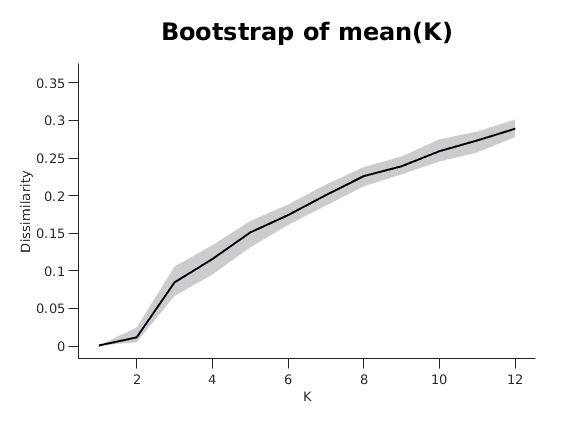

In [188]:
fig('K sample plot');
g=gramm('x', sDtable.k, 'y', sDtable.diss);
g.set_stat_options('alpha',0.01);
g.stat_summary('type','bootci').set_color_options('lightness',0.1, 'chroma',1);
g.set_names('x','K','y','Dissimilarity');
g.set_title('Bootstrap of mean(K)', 'FontSize', 18);
g.draw();

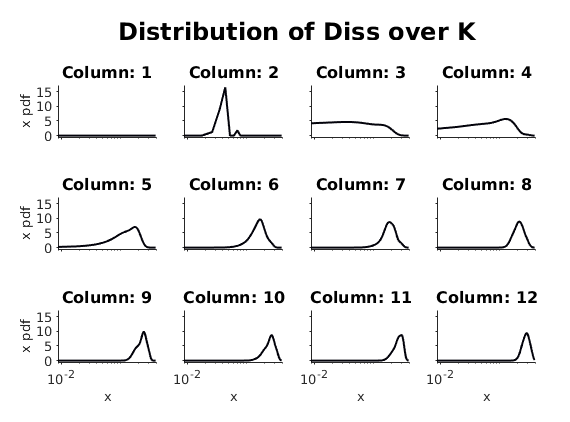

In [180]:
fig('K Distribution');
g=gramm('x', Dtable.diss);
g.facet_wrap(Dtable.k);
g.set_stat_options('alpha',0.01);
g.stat_density('npoints',50).set_color_options('lightness',1,'chroma',1);
g.set_names('y','Dissimilarity','row','K');
g.set_title('Distribution of Diss over K', 'FontSize', 18);
g=g.draw();
set(g.facet_axes_handles,'xscale','log')

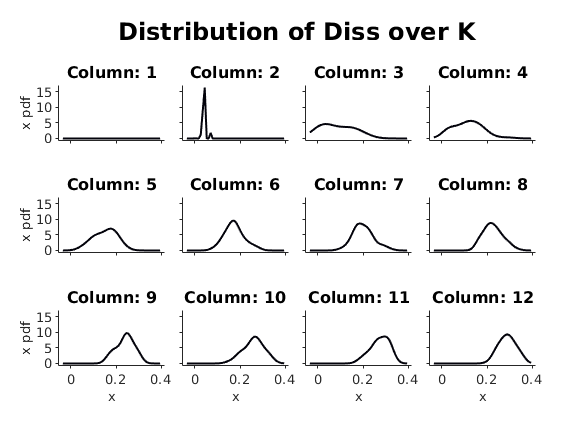

In [198]:
fig('K Distribution');
g=gramm('x', Dtable.diss);
g.facet_wrap(Dtable.k);
g.set_stat_options('alpha',0.01);
g.stat_density('npoints',50).set_color_options('lightness',1,'chroma',1);
g.set_names('y','Dissimilarity','row','K');
g.set_title('Distribution of Diss over K', 'FontSize', 18);
g=g.draw();
set(g.facet_axes_handles,'xscale','linear')

Based on this, I would guess nearly all segments have good dissmilarity for $K=2$ and many segments have good dissimilarity in the $K\in\{3..5\}$ range

Perhaps a good metric to select $K$ would the maximal point at which the median dissimilarity changes. $d($median$(K))/dK$.

Largest disimilarity increases

k =

     8
     6
     5



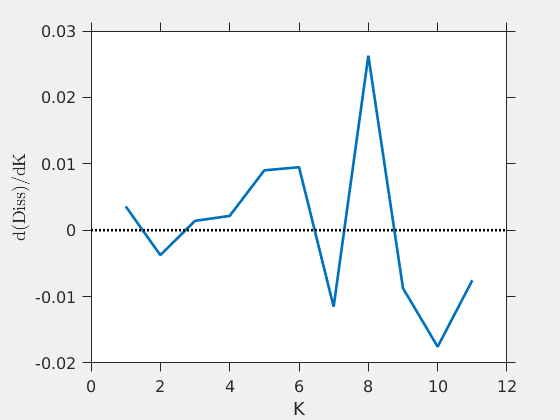

In [199]:
figure
dDiss = diff(quantile(Diss,0.5,2));
plot(dDiss)
disp('Largest disimilarity increases')
[~,k] = maxk(dDiss,3)
xlabel('K')
ylabel('d(Diss)/dK', 'interpreter', 'latex')
l=line([0 12],[0 0]);
set(l,'Color','black','linestyle',':')

At most some of the samples can acheive reasonable dissimilarity at $K=4$ or $5$ before it precipitously jumps at $K=6$.

In [200]:
K = 5;
choosek.K = K;
mfile.choosek = choosek


mfile = 

  matlab.io.MatFile

  Properties:
      Properties.Source: '/home/ryoung/Projects/findParams/choosekrun.seqnmf_speccoh_1'
    Properties.Writable: true                                                          
                choosek: [1x1 struct]                                                  
                   data: [1x1 struct]                                                  
                 params: [ -  table]                                                   



Update mfile

# Choosing $\lambda$ and $\lambda^{Hortho}$: regularization penalty

Let's just setup our $\lambda$ values to search over and some basic structures to record the data.

In [201]:
nLambdas = 25; % increase if you're patient
nSamp = 20;
sample_length = round((60*10)/samprate);
X = trainNEURAL;
lambdas = sort([logspace(-3,-6,nLambdas)], 'ascend'); 
W1penalties = [0, 1e-7, 1e-6, 1e-5];
loadings = [];
cost  = zeros(nSamp, length(W1penalties),length(lambdas));
regularization  = zeros(nSamp, length(W1penalties),length(lambdas));
[Hs, Ws] = deal({});
power  = zeros(nSamp, length(W1penalties),length(lambdas));
[nFreq,nTime]=size(X);

disp("Samples = " + nSamp + " with length = " + sample_length +...
     " points for " + (sample_length/60)*data.params.movingwin(2) + " minutes")

Samples = 20 with length = 24000 points for 10 minutes


And a structure to checkpoint it into.

In [202]:
chooseLambda = struct();
chooseLambda.Ws = {};
chooseLambda.Hs = {};

Run SeqNMF to measure the cost and regularization of those values.

In [204]:
diary_file = '~/Data/deltacoherence/findParams/lambdadiary-choosekrun.seqnmf_speccoh_1';
delete(diary_file)
diary(diary_file)
clear prog
prog = ProgressBar(numel(W1penalties) * numel(lambdas) * nSamp * 2, 'Title', 'Choosing lambda')

% Which sample ranges
samples = randi([1, nTime-sample_length], 1, nSamp)';
samples = [samples, samples+sample_length];

disp('Starting loop')
for samp = 1:nSamp
    for lambdaType = {'lambdaH','lambda'}
    for li = 1:numel(lambdas)
        for wi = 1:numel(W1penalties)
        
            if cost(samp,wi,li) ~= 0
                prog.step([],[],[])
                skip = true;
                continue
            else
                skip = false;
            end
                
            W1penality = W1penalties(wi);
            [N,T] = size(X);
            
            
            kws = {'lambda', single(0), 'lambdaOrthoH', single(0)};
            switch lambdaType{1}
            case 'lambda'
                kws{2} = single(lambdas(li));
            case 'lambdaOrthoH'
                kws{4} = single(lambdas(li));
            end
            
            [Ws{samp, wi,li},...
             Hs{samp, wi,li}, ~, ...
             loadings(samp, wi, li,:),...
             power(samp,wi,li)] = ...
                seqNMF_gpu(X(:, samples(samp,1):samples(samp,2)), ...
                'K',single(K),...
                'L',single(L),... 
                'maxiter', 150, ...
                'showPlot', 0, ...
                'lambdaL1H', single(W1penality),...
                kws{:}); 
                

            [cost(samp, wi, li),regularization(samp, wi, li),~] = ...
                helper.get_seqNMF_cost(X(:,samples(samp,1):samples(samp,2)),...
                                       Ws{samp,wi,li},...
                                       Hs{samp,wi,li});
            prog.step([],[],[]);

        end

        % Save values to struct
        vals = {'loadings', loadings, 'power', power, ...
                'cost', cost, 'regularization', regularization, ...
                'W1penalties', W1penalties, 'lambdas', lambdas};
        for v = 1:2:numel(vals)
            chooseLambda.(vals{v}) = vals{v+1};
        end
        chooseLambda.Hs = Hs;
        chooseLambda.Ws = Ws;
        
    end
    end
    
    % Save struct to file
    if ~skip
        mfile.chooseLambdaK5 = chooseLambda;
    end
    
end


prog = 

  ProgressBar with properties:

     TIMER_TAG_NAME: 'ProgressBar'
            VERSION: '3.1.0'
              Total: 4000
              Title: 'Choosing lambda'
         UpdateRate: 5
               Unit: 'Iterations'
    WorkerDirectory: '/tmp/'
         UseUnicode: true
         IsParallel: false

Starting loop

SeqNMF_gpu:  000%  |                                        | 0/150 [00:00:00<Inf:NaN:NaN, Inf it/s

Error using eval
Unrecognized function or variable 's'.



We  will eventually have to interpolate the lambdas we measured to optomize

In [88]:
lambdainterp = linspace(min(lambdas), max(lambdas), 5e6);
I = @(x,y) interp1(x,y,lambdainterp,'linear');

In [12]:
fieldnames(mfile)
chooseLambda = mfile.chooseLambda;
utils.restoreVariables(chooseLambda);


ans =

  1x1 cell array

    {'Properties'}

restoring variables
restored.


Index in position 1 is invalid. Array indices must be positive integers or logical values.



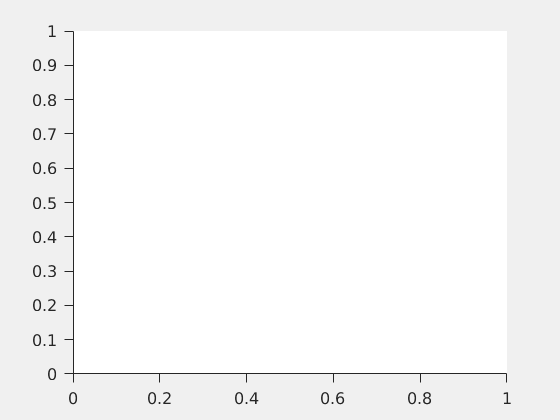

In [10]:
clear F
F= {};
targetLambdas = [];
reg = [];
Csi = {};
Rsi = {};
%% plot costs as a function of lambda
for wi = 1:length(W1penalties)
    fig([folder ' WL1 = ' + string(W1penalties(wi))]); clf
    F{end+1} = gcf;
    windowSize = 3; 
    b = (1/windowSize)*ones(1,windowSize);
    a = 1;
    %Filter regularization penalty
    Rs = filtfilt(b,a,regularization(wi,:)); % Filtered regularization
    % Normalize reg penalty
    minRs = prctile(regularization(wi,:),10); 
    maxRs = prctile(regularization(wi,:),90);
    Rs = (Rs-minRs)/(maxRs-minRs); % filtered: 0 to 1
    R = (regularization(wi,:)-minRs)/(maxRs-minRs);  % unfiltered: 0 to 1
    Cs = filtfilt(b,a,cost(wi,:));  % filter cost
    minCs =  prctile(cost(wi,:),10); maxCs =  prctile(cost(wi,:),90);
    Cs = (Cs -minCs)/(maxCs-minCs); % filtered : Scale cost 0 to 1
    C = (cost(wi,:) -minCs)/(maxCs-minCs);  % unfiltered : Scale cost 0 to 1
    % Plot crossing
    clf; hold on
    Rsi{wi} = I(lambdas,Rs);
    Csi{wi} = I(lambdas,Cs);
    plot(lambdainterp,Rsi{wi}, 'b')
    plot(lambdainterp,I(lambdas,Csi{wi}),'r')
    scatter(lambdas, R, 'b', 'markerfacecolor', 'flat');
    scatter(lambdas, C, 'r', 'markerfacecolor', 'flat');
    xlabel('Lambda'); ylabel('Cost (au)')
    set(legend('Correlation cost', 'Reconstruction cost'), 'Box', 'on')
    set(gca, 'xscale', 'log', 'ytick', [], 'color', 'none')
    set(gca,'color','none','tickdir','out','ticklength', [0.025, 0.025])
    [~,targetLambdas(end+1)] = min( abs(I(lambdas, Cs)-I(lambdas,Rs)) );
    targetLambdas(end) = lambdainterp(targetLambdas(end));
end

Let's examine what those $W$s look like on well-optomized sets

Finally, let's checkout the 3d curve for the above

In [ ]:
fig([folder ' W1 relation to penalty']); clf;
F{end+1} = gcf;
plot(W1penalties, targetLambdas, '*:');
set(gca,'xscale','linear');
title(sprintf('Corrcoeff = %0.2f %0.2f %0.2f %0.2f', corrcoef([W1penalties', targetLambdas'])));
chooseLambda = struct('loadings', loadings, 'power', power, ...
                        'cost', cost, 'regularization', regularization, ...
                        'W1penalties', W1penalties, 'lambdas', lambdas, 'targetLambdas', targetLambdas);
                        

In [ ]:
clear chooseLambda
chooseLambda.Ws = Ws;
chooseLambda.Hs = Hs;
chooseLambda.F = F;
mfile.chooseLambda = chooseLambda;

In [ ]:
%Code to fix improper save structure
% chooseLambda = mfile.chooseLambda;
% Ws = reshape({chooseLambda.Ws}, size(chooseLambda));
% Hs = reshape({chooseLambda.Hs}, size(chooseLambda));
% chooseLambda = chooseLambda(end);
% chooseLambda.W1penalties = W1penalties;
% chooseLambda.lambdas     = targetLambdas;
% chooseLambda.Ws     = Ws;
% chooseLambda.Hs     = Hs;
% mfile.chooseLambda = chooseLambda;

the MATLAB function has been cancelled


# Choose *${\lambda}_{H}$*

## Strategy 1: With former $\lambda-W_1$ pairs

In [ ]:
chooseLambda = mfile.chooseLambda;

%% Procedure for choosing lambda
paramChoices = 1:numel(chooseLambda.targetLambdas);
nLambdas = 30; % increase if you're patient
X = trainNEURAL;
ortholambdas = sort([logspace(-1,-7,nLambdas)], 'ascend'); 
% Preallocate
clear loadings cost regularization Hs Ws power
%loadings = [];
%cost  = zeros(length(W1penalties),length(lambdas));
%regularization  = zeros(length(W1penalties),length(lambdas));
%[Hs, Ws] = deal(cell(numel(lambdas),numel(W1penalties)));
%power  = zeros(length(W1penalties),length(lambdas));

[N,T] = size(X);
[OLAM, FITS] = meshgrid(1:numel(ortholambdas), 1:numel(paramChoices));

prog = ProgressBar(2 * numel(OLAM), 'Title', 'Choosing lambda')

dissimilarity_index = 2; 

while dissimilarity_index <= 4
    for use_lam = [1, 0]
        for row = 1:numel(OLAM)
                if size(Ws,1) >= dissimilarity_index && ~isempty(Ws{dissimilarity_index, use_lam+1, row})
                    disp("Continuing")
                    continue
                end
                display(['OrthoH opt: Testing paramset ' num2str(row) '/' num2str(numel(row)*2)])
                % Indices and parameters to describe the computation in this cycle
                i = FITS(row)
                orthoi = OLAM(row);
                W1penality = W1penalties(i);
                if use_lam
                    lambda = targetLambdas(i);
                else
                    lambda = 0;
                end
                % SeqNMF
                [Ws{dissimilarity_index, use_lam+1, row}, Hs{dissimilarity_index, use_lam+1, row}, ...
                 C, loadings(dissimilarity_index, use_lam+1, row,:),...
                 power(dissimilarity_index, use_lam+1, row)] = ...
                    seqNMF_gpu(X, ...
                    'K',single(K),...
                    'L',single(L),...
                    'lambda', lambda,...
                    'lambdaOrthoH', single(ortholambdas(li)),...
                    'maxiter', 150,...
                    'showPlot', 0, ...
                    'lambdaL1H', single(W1penality)); 
                % Compute the cost and reugularization penalty
                [cost(dissimilarity_index, use_lam+1, row),...
                 regularization(dissimilarity_index, use_lam+1, row), ~] =... 
                 helper.get_seqNMF_cost(X,Ws{dissimilarity_index, use_lam+1, row},...
                                        Hs{dissimilarity_index, use_lam+1, row});
                % Save the results
                chooseLambdaOrthoH = struct('loadings', loadings, ...
                                            'power', power, ...
                                            'cost', cost,...
                                            'regularization', regularization, ...
                                            'W1penalties', W1penalties,...
                                            'lambdas', lambdas,...
                                            'orthoi', orthoi,...
                                            'i', 1:numel(OLAM),...
                                            'use_lam', [1,0]);
        end
    end
    mfile.chooseLambdaOrthoH = chooseLambdaOrthoH;
    mfile.chooseLambdaOrthoH_Hs = Hs;
    mfile.chooseLambdaOrthoH_Ws = Ws;
    dissimilarity_index = dissimilarity_index + 1;
end

% Okay now we need to compute dissimilarity
Diss = zeros(size(Hs));
inds = nchoosek(1:dissimilarity_index,2);
for comp = 1:size(inds,1)
    for i = 1:size(Hs,2)
        for j = 1:size(Hs,3)
            disp(comp + "," + i + "," + j);
            Diss(comp,i,j) = ...
            helper.DISSX(Hs{inds(i,1),i,j},...
                         Ws{inds(i,1),i,j},...
                         Hs{inds(i,2),i,j},...
                         Ws{inds(i,2),i,j},'gpu',true);
        end
    end
end

[OLAM, FITS] = ndgrid(1:numel(ortholambdas), 1:numel(paramChoices));

In [ ]:
% Visualize dissimilarity surfaces!
muDiss = squeeze(mean(Diss));
% Color use_lam = 0
sz = size(OLAM);
msz = max(sz);
CO1(:,:,1) = zeros(sz); % red
CO1(:,:,2) = ones(sz).*linspace(0.5,0.6,msz); % green
CO1(:,:,3) = ones(sz).*linspace(0,1,msz); % blue
% Color use_lam = 1
CO2(:,:,3) = zeros(sz); % red
CO2(:,:,1) = ones(sz).*linspace(0.5,0.6,msz); % green
CO2(:,:,2) = ones(sz).*linspace(0,1,msz); % blue
fig('LambdaOrthoH-no-smoothing');clf
s1 = surf(ortholambdas(OLAM), paramChoices(FITS), reshape(muDiss(1,:), sz), CO1);
xlabel('\lambda^{\perp}_{H}')
ylabel('\lambda & W1 choice')
%s1 = surf(ortholambdas(OLAM), paramChoices(FITS), reshape(muDiss(1,:), sz), CO1);
set(gca,'xscale','log')
hold on
s2 = surf(ortholambdas(OLAM), paramChoices(FITS), reshape(muDiss(2,:), sz), CO2);
%s2 = surf(ortholambdas(OLAM), paramChoices(FITS), reshape(muDiss(2,:), sz), CO2);
set(gca,'xscale','log')
alpha(s1,0.5);
alpha(s2,0.5);
legend([s1, s2], 'Overall Lambda = false', 'Overall Lambda = true');

In [ ]:
% Visualize dissimilarity surfaces!
muDiss = squeeze(mean(Diss));
% Color use_lam = 0
sz = size(OLAM);
msz = max(sz);
CO1(:,:,1) = zeros(sz); % red
CO1(:,:,2) = ones(sz).*linspace(0.5,0.6,msz); % green
CO1(:,:,3) = ones(sz).*linspace(0,1,msz); % blue
% Color use_lam = 1
CO2(:,:,3) = zeros(sz); % red
CO2(:,:,1) = ones(sz).*linspace(0.5,0.6,msz); % green
CO2(:,:,2) = ones(sz).*linspace(0,1,msz); % blue
fig('LambdaOrthoH-smoothing');clf
s1 = surf(ortholambdas(OLAM), paramChoices(FITS), squeeze(smooth3(shiftdim(reshape(muDiss(1,:), sz),-1))), CO1);
xlabel('\lambda^{\perp}_{H}')
ylabel('\lambda & W1 choice')
%s1 = surf(ortholambdas(OLAM), paramChoices(FITS), reshape(muDiss(1,:), sz), CO1);
set(gca,'xscale','log')
hold on
s2 = surf(ortholambdas(OLAM), paramChoices(FITS), squeeze(smooth3(shiftdim(reshape(muDiss(2,:), sz),-1))), CO2);
%s2 = surf(ortholambdas(OLAM), paramChoices(FITS), reshape(muDiss(2,:), sz), CO2);
set(gca,'xscale','log')
alpha(s1,0.5);
alpha(s2,0.5);
legend([s1, s2], 'Overall Lambda = false', 'Overall Lambda = true');

In [ ]:
regularizationSurfaces = containers.Map('KeyType', 'int32', 'ValueType', 'any');
costSurfaces = containers.Map('KeyType', 'int32', 'ValueType', 'any');
clear CO1 CO2
[OLAM, FITS] = meshgrid(1:numel(ortholambdas), 1:numel(paramChoices));
smoothit=false;
for use_lam = [0,1]
    % Visualize dissimilarity surfaces!
    sz = size(OLAM);
    msz = max(sz);
    muReg = squeeze(mean(regularization(:,use_lam+1,:)));
    muCost = squeeze(mean(cost(:,use_lam+1,:)));
    muReg = reshape(muReg, sz);
    muCost = reshape(muCost, sz);
    if smoothit
        muReg = squeeze(smooth3(shiftdim(muReg,-1)));
        muCost = squeeze(smooth3(shiftdim(muCost,-1)));
    end
    % Normalize
    muCost=(muCost-min(muCost,[],'all'))./(max(muCost,[],'all')-min(muCost,[],'all'));
    muReg=(muReg-min(muReg,[],'all'))./(max(muReg,[],'all')-min(muReg,[],'all'));
    % Color use_lam = 0
    CO1(:,:,1) = zeros(sz); % red
    CO1(:,:,2) = (ones(sz).*linspace(0.5,0.6,msz)); % green
    CO1(:,:,3) = (ones(sz).*linspace(0,1,msz)); % blue
    % Color use_lam = 1
    CO2(:,:,3) = zeros(sz); % red
    CO2(:,:,1) = (ones(sz).*linspace(0.5,0.6,msz)); % green
    CO2(:,:,2) = (ones(sz).*linspace(0,1,msz)); % blue
    f=fig("CostReg uselam=" + use_lam);figure(f);clf
    cs = reshape(muReg(:), sz);
    costSurfaces(use_lam) = cs;
    s1 = surf(ortholambdas(OLAM), paramChoices(FITS), costSurfaces(use_lam), CO1);
    xlabel('\lambda^{\perp}_{H}')
    ylabel('\lambda & W1 choice')
    %s1 = surf(ortholambdas(OLAM), paramChoices(FITS), reshape(muDiss(1,:), sz), CO1);
    set(gca,'xscale','log')
    hold on
    rs = reshape(muCost(:), sz);
    regularizationSurfaces(use_lam) = rs;
    s2 = surf(ortholambdas(OLAM), paramChoices(FITS), rs, CO2);
    OL = ortholambdas(OLAM);
    PC = paramChoices(FITS);
    %s2 = surf(ortholambdas(OLAM), paramChoices(FITS), reshape(muDiss(2,:), sz), CO2);
    set(gca,'xscale','log')
    alpha(s1,0.5);
    alpha(s2,0.5);
    legend([s1, s2], 'Regularization', 'Cost');
end

## Strategy 2: without $\lambda$

In [ ]:
Ws = {};
Hs = {};
numfits = 3; %number of fits to compare
for k = 1:12
    display(sprintf('running seqNMF with K = %i',k))
    for ii = 1:numfits
        [Ws{ii,k},Hs{ii,k}] = seqNMF_gpu(X,'K',k, 'L', L,'lambda', 0,'maxiter',100,'showplot',0); 
        % note that max iter set low (30iter) for speed in demo (not recommended in practice)
    end
    inds = nchoosek(1:numfits,2);
    for i = 1:size(inds,1) % consider using parfor for larger numfits
            Diss(i,k) = helper.DISSX(Hs{inds(i,1),k},Ws{inds(i,1),k},Hs{inds(i,2),k},Ws{inds(i,2),k});
    end
    
end
toc
%% Plot Diss and choose K with the minimum average diss.
figure,
plot(1:10,Diss,'ko'), hold on
h1 = plot(1:10,median(Diss,1),'k-','linewidth',2);
h2 = plot([3,3],[0,0.5],'r--');
legend([h1 h2], {'median Diss','true K'})
xlabel('K')
ylabel('Diss')

In [ ]:
display('Testing significance of factors on held-out data')
[pvals,is_significant] = test_significance(testNEURAL,W);

W = W(:,is_significant,:); 
H = H(is_significant,:); 

In [ ]:
tic
loadings = [];
pvals = []; 
is_significant = []; 
X = trainNEURAL;
nIter = 20; % increase if patient
display('Running seqNMF multiple times for lambda=0.005')

for iteri = 1:nIter
    [W, H, ~,loadings(iteri,:),power]= seqNMF(X,'K',K,'L',Lneural,...
            'lambdaL1H', .1, 'lambda', targetLambda, 'maxiter', 100, 'showPlot', 0); 
    p = .05;
    [pvals(iteri,:),is_significant(iteri,:)] = test_significance(testNEURAL,W);
    W = W(:,is_significant(iteri,:)==1,:); 
    H = H(is_significant(iteri,:)==1,:); 
    [max_factor, L_sort, max_sort, hybrid] = helper.ClusterByFactor(W(:,:,:),1);
    indSort = hybrid(:,3);
    tstart = 300; 
    clf; WHPlot(W(indSort,:,:),H(:,tstart:end), X(indSort,tstart:end), 0,...
                 trainSONG(:,floor(tstart*SONGfs/VIDEOfs):end))
    display(['seqNMF run ' num2str(iteri) '/' num2str(nIter)])
end
figure; hold on
h = histogram(sum(is_significant,2), 'edgecolor', 'w', 'facecolor', .7*[1 1 1]); 
h.BinCounts = h.BinCounts/sum(h.BinCounts)*100; 
xlim([0 10]); 
xlabel('# significant factors')
ylabel('% seqNMF runs')

%% Plot factor-triggered song examples and rastors
addpath(genpath('misc_elm')); 
figure; HTriggeredSpec(H,trainSONG,VIDEOfs,SONGfs,Lsong); 
%figure; HTriggeredRaster(H,trainNEURAL(indSort,:),Lneural);
